## Data preprocessing

In [2]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("edges.csv")
meta = pd.read_csv("nodes.csv")
G = nx.DiGraph()
for row in df.iterrows():
    G.add_edge(row[1]["source"], row[1]["target"], count=row[1]["weight"])
for n in G.nodes():
        G.nodes[n]["index"] = meta.loc[n]["index"]
        G.nodes[n]["bred"] = meta.loc[n]["bred"]
        G.nodes[n]["age"] = meta.loc[n]["age"]

## Dominance relation between each Bison

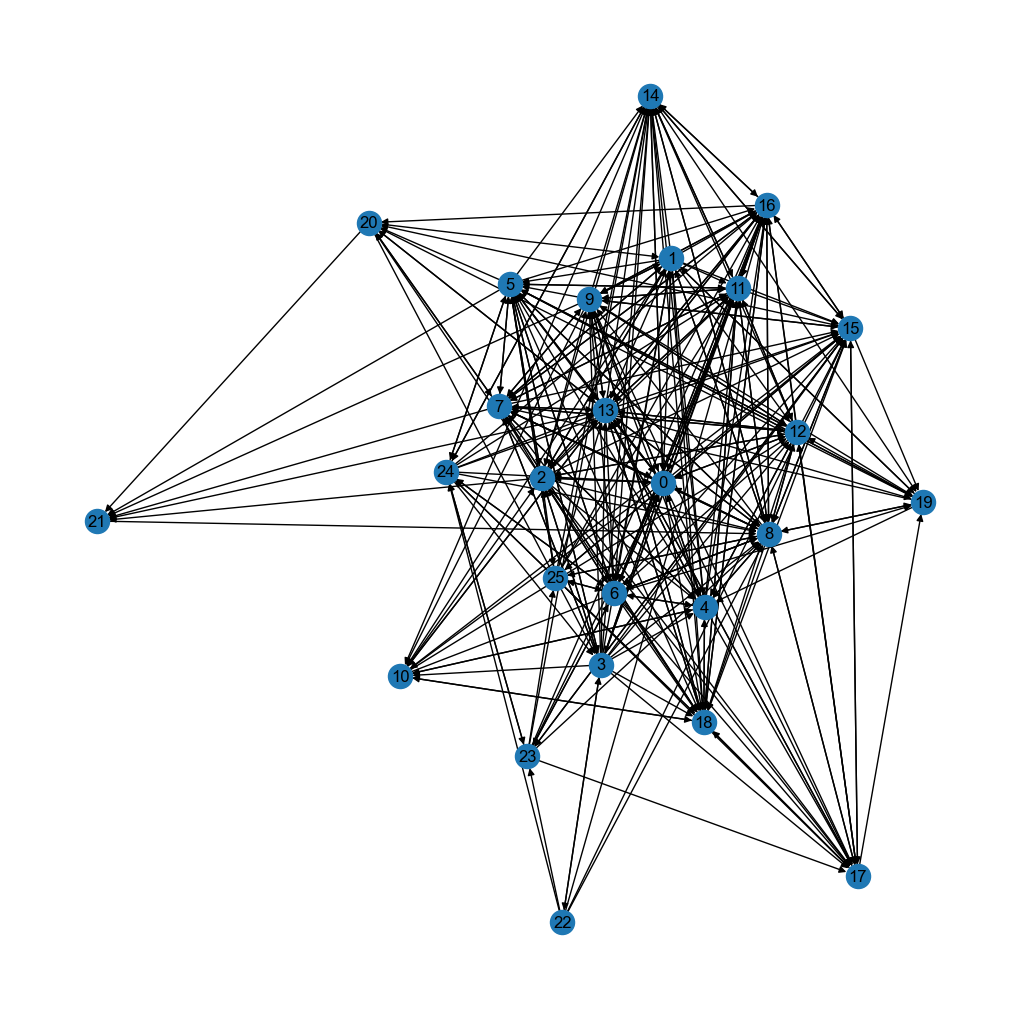

In [3]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True)
plt.show()

## Betweenness Centrality

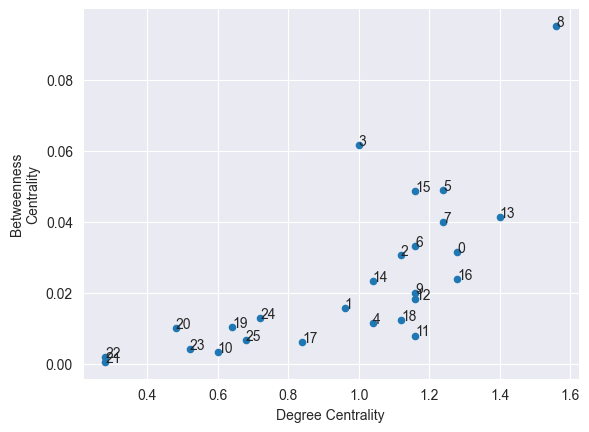

In [4]:
import seaborn as sns
bc = pd.Series(nx.betweenness_centrality(G))
dc = pd.Series(nx.degree_centrality(G))

df = pd.DataFrame({'bc': bc, 'dc': dc})
ax = df.plot(x='dc', y='bc', kind='scatter')
ax.set_ylabel('Betweenness\nCentrality')
ax.set_xlabel('Degree Centrality')
for i, point in df.iterrows():
    ax.text(point['dc'], point['bc'], str(i))
sns.despine()
plt.show()

## Matrix Plot Grouped By Bred Attribute

/Users/siyuyang/Desktop/CSCI5980/DS 5610/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


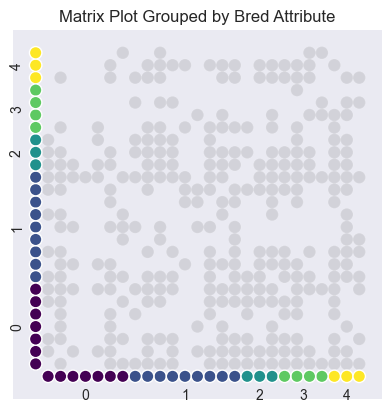

In [5]:
import nxviz as nv
from nxviz import annotate

m = nv.matrix(G, group_by="bred", node_color_by="bred")
annotate.matrix_group(G, group_by="bred")
plt.title("Matrix Plot Grouped by Bred Attribute")
plt.show()

## The attribute of each node

In [6]:
list(G.nodes(data=True))

[(0, {'index': 0, 'bred': 4, 'age': 7}),
 (1, {'index': 1, 'bred': 1, 'age': 10}),
 (2, {'index': 2, 'bred': 2, 'age': 9}),
 (3, {'index': 3, 'bred': 3, 'age': 7}),
 (4, {'index': 4, 'bred': 3, 'age': 12}),
 (5, {'index': 5, 'bred': 4, 'age': 8}),
 (6, {'index': 6, 'bred': 1, 'age': 11}),
 (7, {'index': 7, 'bred': 1, 'age': 10}),
 (8, {'index': 8, 'bred': 1, 'age': 6}),
 (9, {'index': 9, 'bred': 0, 'age': 8}),
 (10, {'index': 10, 'bred': 0, 'age': 7}),
 (11, {'index': 11, 'bred': 2, 'age': 8}),
 (12, {'index': 12, 'bred': 1, 'age': 6}),
 (13, {'index': 13, 'bred': 0, 'age': 6}),
 (14, {'index': 14, 'bred': 1, 'age': 5}),
 (15, {'index': 15, 'bred': 0, 'age': 12}),
 (16, {'index': 16, 'bred': 0, 'age': 8}),
 (17, {'index': 17, 'bred': 0, 'age': 9}),
 (18, {'index': 18, 'bred': 2, 'age': 10}),
 (19, {'index': 19, 'bred': 1, 'age': 12}),
 (20, {'index': 20, 'bred': 1, 'age': 6}),
 (21, {'index': 21, 'bred': 0, 'age': 11}),
 (22, {'index': 22, 'bred': 3, 'age': 8}),
 (25, {'index': 25, 'br